# Lab 3 
## W203 Statistics for Data Science
### Annabelle Lee, Joy Chiang, Lucas Lam

## Introduction

Research Question: What variables have impact to reduce the crime rate in North Carolina?

The following report has been generated to provide the local government with informationsupporting policies that lower crime rates in North Carolina. We want to question the scenarios enablingcriminals carrying out a crime successfully in the face of punishment. This entails a detailed analysis on thecrime rate and factors including the demographic of criminals, police involved, and probability of punishment. Ultimately, our goal is to set policy in such a way that incentivizes better choices and sets up deterrents forfuture criminal activity. Variables capturing certainty and severity of punishment help us think about the practical implicationsinvolved with carrying out crime. We will also look at the population of young males since gender and ageare usually some of the best predictors of crime.

## Initial Data Loading and Cleaning

In [22]:
library(car)
library(stargazer)
library(plyr)

variable  | label
----------|------
1    county|               county identifier
2      year|                            1987
3    crmrte|     crimes committed per person
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
10    taxpc|          tax revenue per capita
11     west|           =1 if in western N.C.
12  central|           =1 if in central N.C.
13    urban|                   =1 if in SMSA
14 pctmin80|            perc. minority, 1980
15     wcon|       weekly wage, construction
16     wtuc|    wkly wge, trns, util, commun
17     wtrd| wkly wge, whlesle, retail trade
18     wfir|    wkly wge, fin, ins, real est
19     wser|      wkly wge, service industry
20     wmfg|         wkly wge, manufacturing
21     wfed|         wkly wge, fed employees
22     wsta|       wkly wge, state employees
23     wloc|        wkly wge, local gov emps
24      mix| offense mix: face-to-face/other
25  pctymle|              percent young male

In [10]:
crime = read.csv(file = 'crime_v2.csv')
head(crime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [3]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [5]:
str(crime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [11]:
# summary output the whole list of variables due to occurrences of non-numeric values
summary(crime$prbconv)

` 0.068376102 0.140350997 0.154451996 0.203724995 
          5           1           1           1           1           1 
0.207830995    0.220339 0.226361006 0.229589999 0.248275995 0.259833008 
          1           1           1           1           1           1 
0.267856985 0.271946996  0.28947401 0.300577998 0.308411002 0.314606994 
          1           1           1           1           1           1 
0.322580993 0.325300992 0.327868998 0.328664005 0.334701002 0.340490997 
          1           1           1           1           1           1 
0.343023002 0.347799987 0.352941006  0.36015299 0.364353001 0.371879011 
          1           1           1           1           1           1 
   0.381908 0.384236008 0.385495991 0.386925995 0.393413007    0.401198 
          1           1           1           1           1           1 
0.403780013 0.406780005 0.410596013 0.412698001 0.426777989 0.436441004 
          1           1           1           1           1           1 
0.438960999 0.443114012 0.443681002 0.449999988 0.450567007 0.452829987 
          1           1           1           1           1           1 
0.457210004 0.459215999 0.468531013 0.476563007 0.477732986 0.492940009 
          1           1           1           1           1           1 
0.493438005 0.495575011  0.50819701 0.515464008 0.520606995 0.520709991 
          1           1           1           1           1           1 
0.522387981 0.525424004 0.527595997 0.528302014 0.548494995 0.549019992 
          1           1           1           1           1           1 
0.559822977 0.571429014 0.573943973 0.588859022 0.589905024 0.595077991 
          1           1           1           2           1           1 
 0.62251699 0.722972989 0.736908972 0.739394009 0.763333023 0.769231021 
          1           1           1           1           1           1 
0.781608999 0.793232977 0.909090996 0.972972989 1.015380025 1.068969965 
          1           1           1           1           1           1 
1.182929993 1.225610018 1.234380007 1.358139992 1.481480002         1.5 
          1           1           1           1           1           1 
1.670519948 2.121210098 
          1           1

In [12]:
crime$prbconv <- as.numeric(levels(crime$prbconv))[crime$prbconv]
summary(crime$prbconv)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121       6 

In [40]:
crime_cleaned = crime[!is.na(crime$prbconv), ]
summary(crime_cleaned$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121 

In [41]:
summary(crime_cleaned$county)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    52.0   105.0   101.6   152.0   197.0 

In [44]:
crime_cleaned$county <- NULL
summary(crime_cleaned$county)

Length  Class   Mode 
     0   NULL   NULL 

In [ ]:
summary(crime_cleaned$year)

In [45]:
crime_cleaned$year <- NULL
crime_cleaned <-na.omit(crime_cleaned)

In [32]:
crime_cleaned <-na.omit(crime_cleaned)

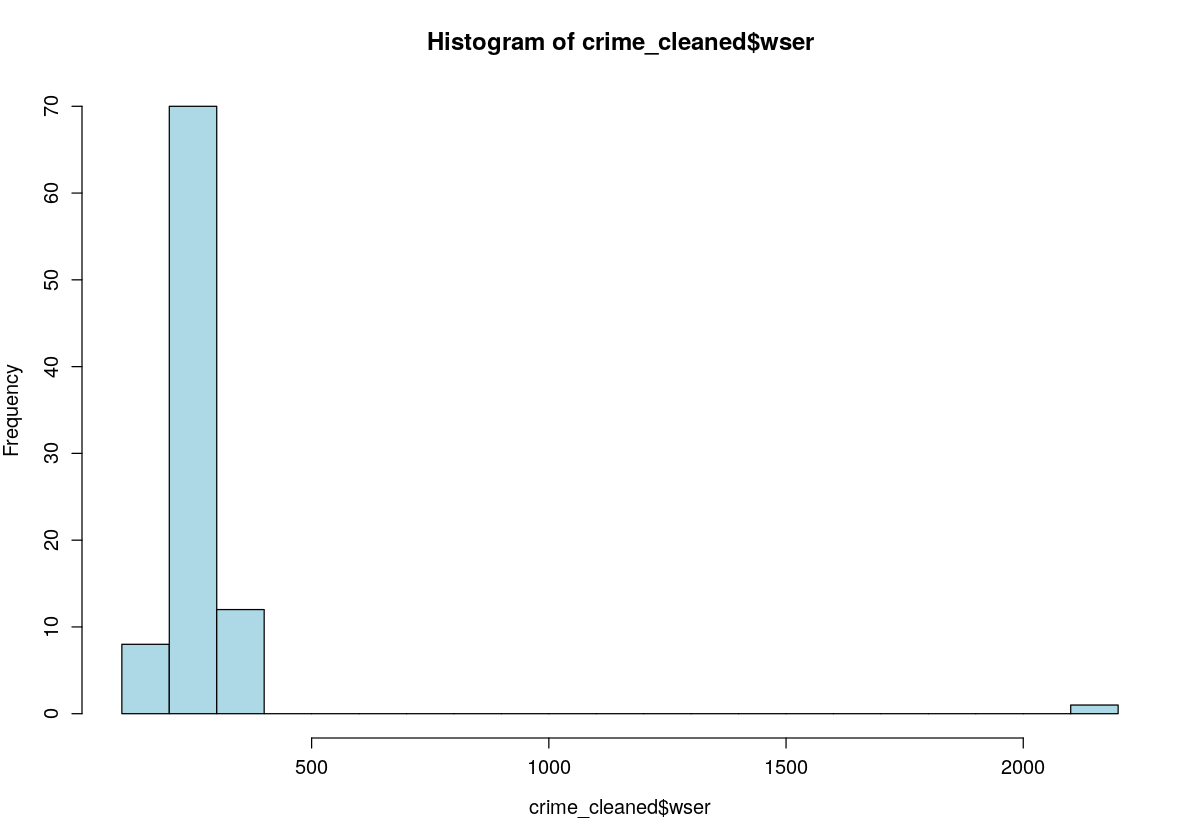

In [62]:
hist(crime_cleaned$wser, breaks = 20, col="lightblue")

In [64]:
wage_high <- crime_cleaned[crime_cleaned$wser>2000,]
wage_high

,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84,0.0108703,0.195266,2.12121,0.442857,5.38,0.0012221,0.3887588,40.82454,0,1,⋯,331.565,167.3726,264.4231,2177.068,247.72,381.33,367.25,300.13,0.04968944,0.07008217


In [65]:
crime_cleaned <- crime_cleaned[crime_cleaned$wser<2000,]

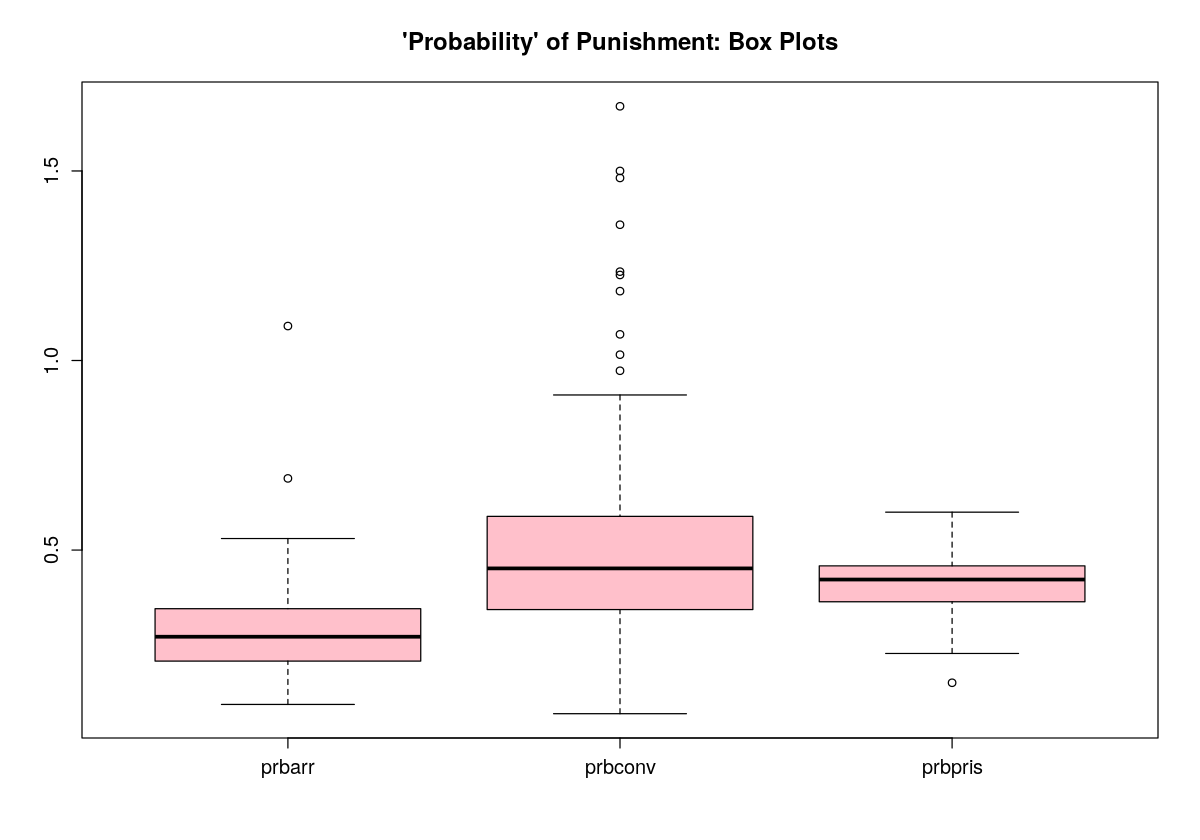

In [71]:
res <-cor(crime_cleaned)
boxplot(crime_cleaned[c(2:4)],
        data=crime_cleaned,
        main="'Probability' of Punishment: Box Plots",
        col="pink")

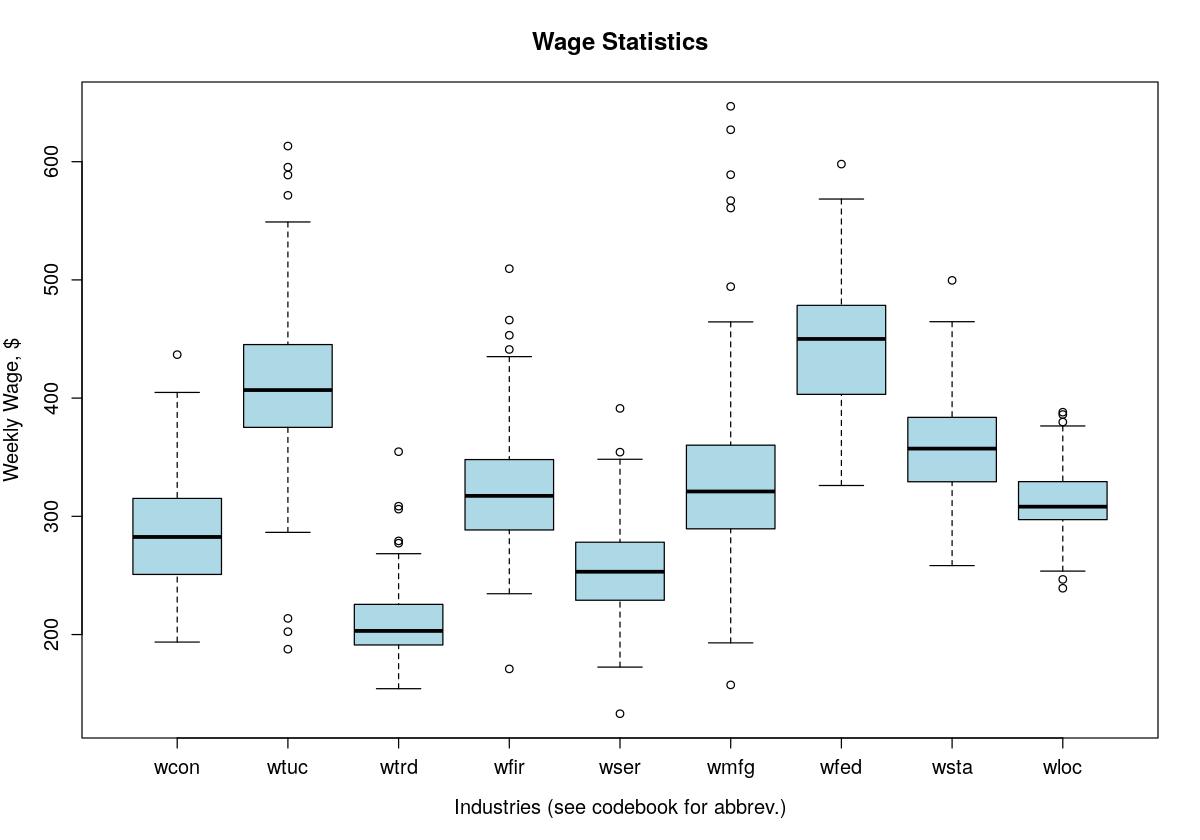

In [72]:
boxplot(crime_cleaned[c(13:21)], 
        ylab = "Weekly Wage, $", 
        xlab = "Industries (see codebook for abbrev.)",
        data = crime_cleaned,
        main = "Wage Statistics",
        col = "lightblue")

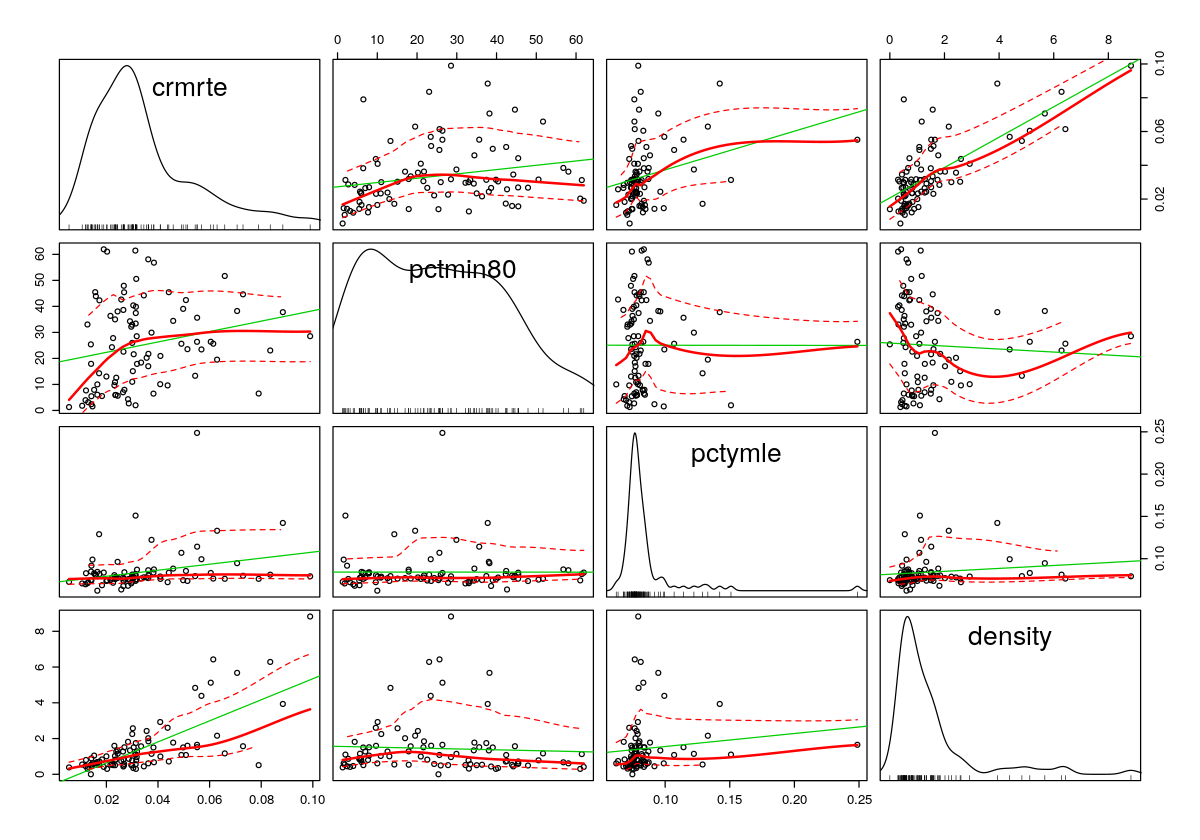

In [75]:
scatterplotMatrix(crime_cleaned[,c("crmrte","pctmin80","pctymle", "density")])

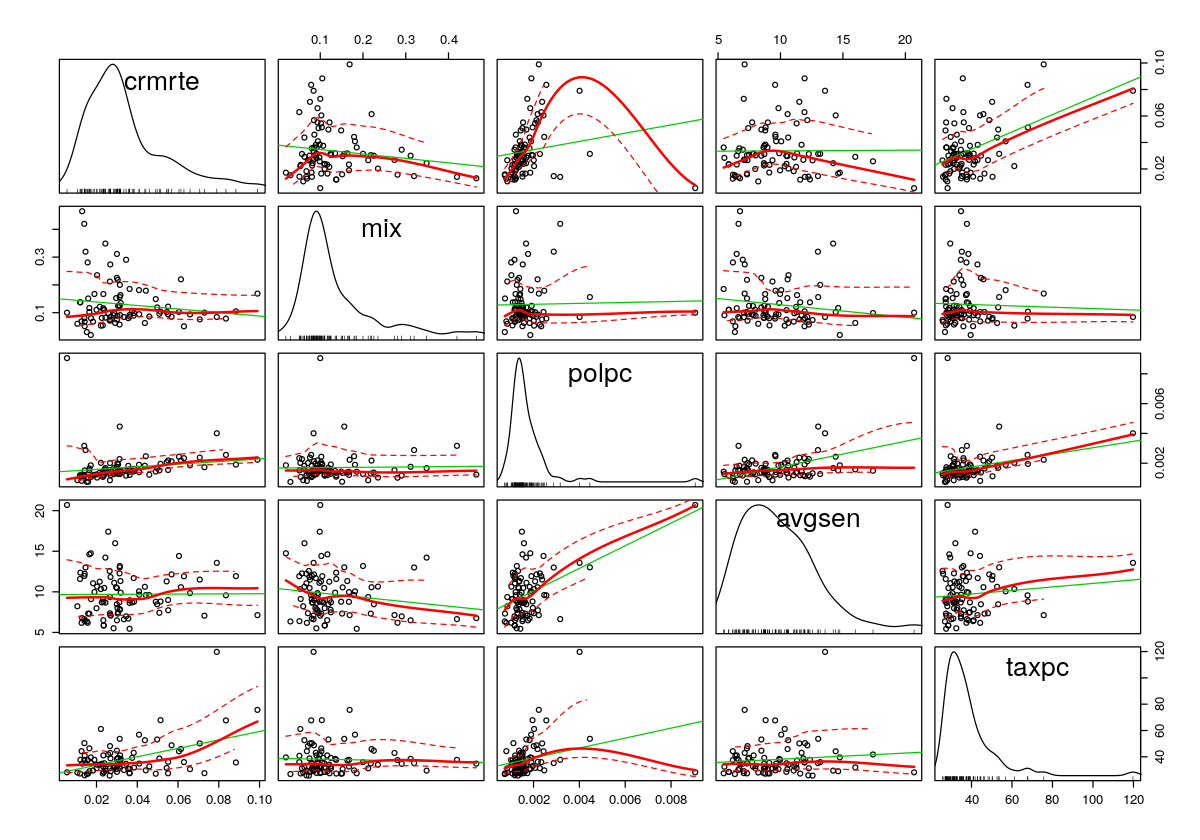

In [76]:
scatterplotMatrix(crime_cleaned[,c("crmrte", "mix","polpc","avgsen", "taxpc")])

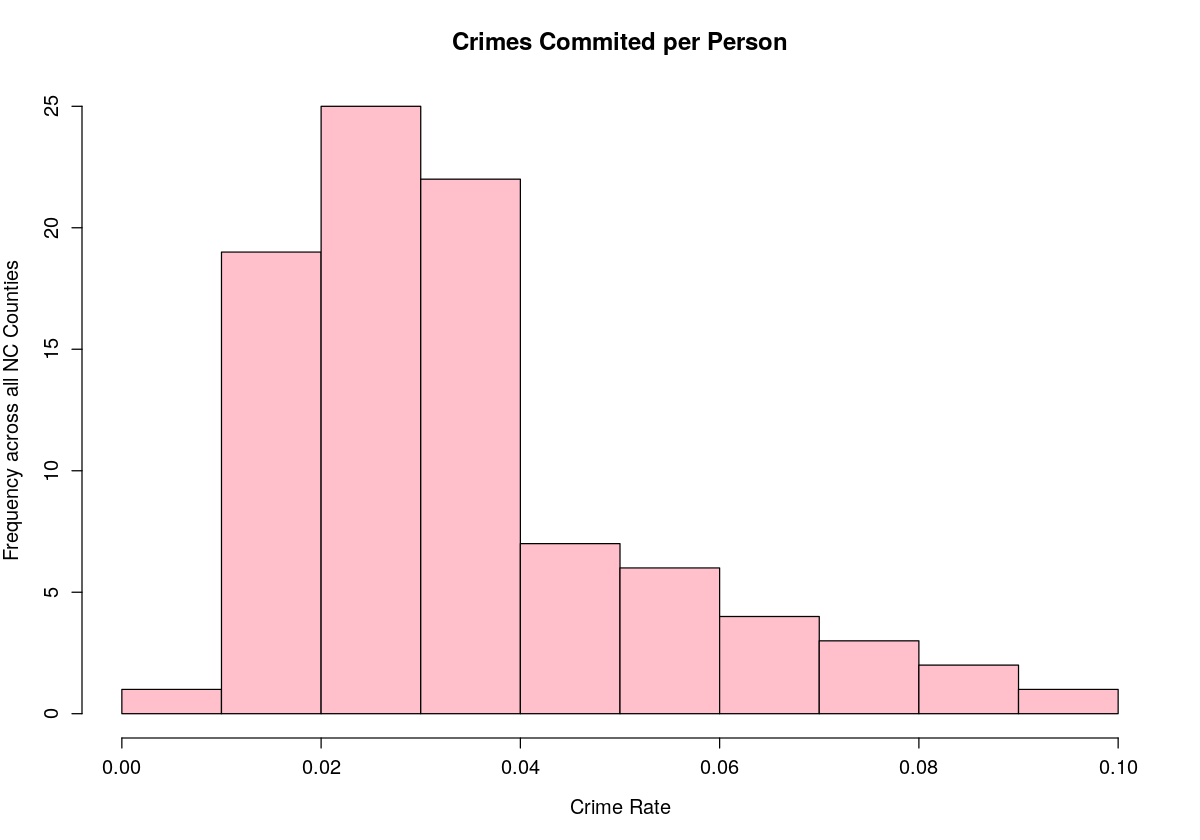

In [79]:
hist(crime_cleaned$crmrte, 
     xlab='Crime Rate', 
     ylab='Frequency across all NC Counties', 
     col='pink', 
     main='Crimes Commited per Person')

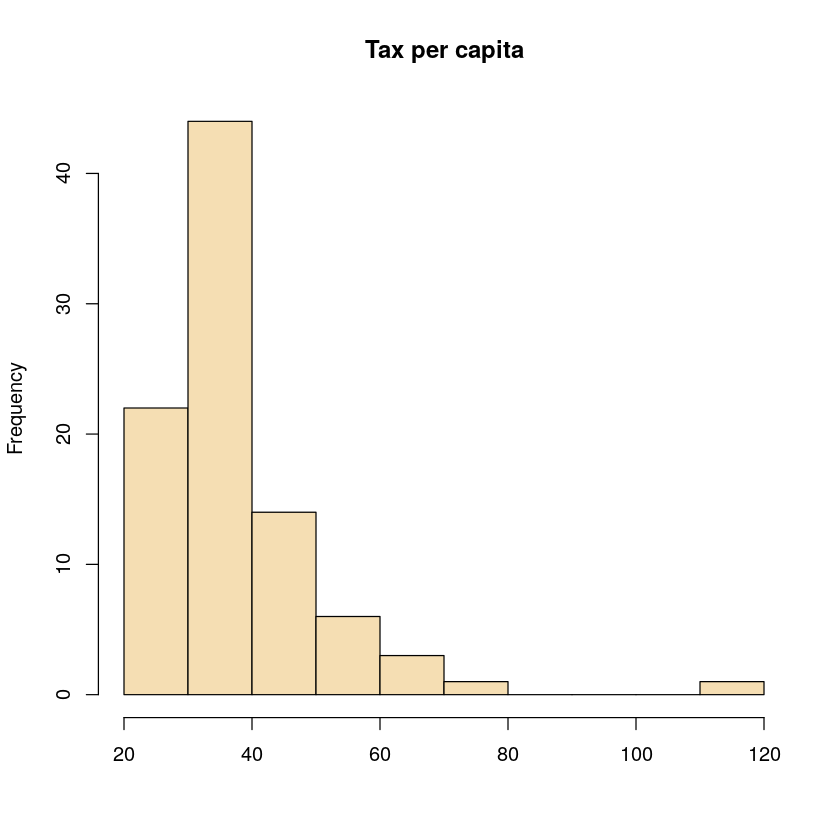

In [36]:
hist(crime_cleaned$taxpc, 
     main="Tax per capita",
     ylab="Frequency", 
     col='wheat', xlab=NULL)

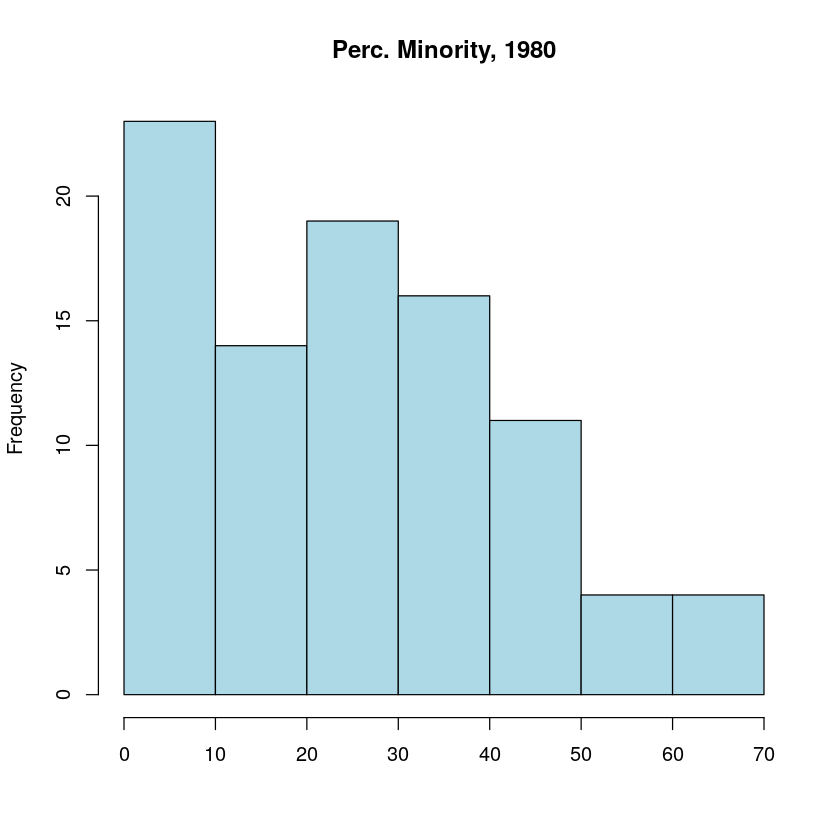

In [37]:
hist(crime_cleaned$pctmin80, main = "Perc. Minority, 1980", col='lightblue', xlab=NULL)

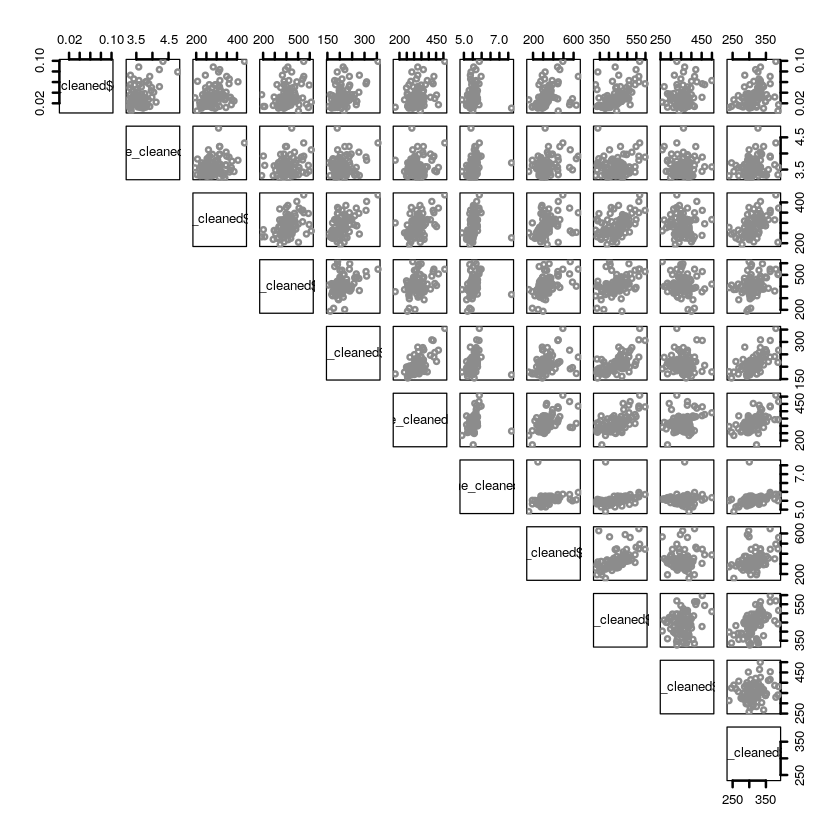

In [52]:
pairs(~crime_cleaned$crmrte 
      + log(crime_cleaned$taxpc)
      + crime_cleaned$wcon
      + crime_cleaned$wtuc
      + crime_cleaned$wtrd
      + crime_cleaned$wfir
      + log(crime_cleaned$wser)
      + crime_cleaned$wmfg
      + crime_cleaned$wfed
      + crime_cleaned$wsta
      + crime_cleaned$wloc,
      cex.labels=1, lower.panel = NULL,
      pch=1,cex=1,lwd=2,col="grey55")
options(repr.plot.height = 7, repr.plot.width = 10, repr.plot.pointsize = 10)